In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import wandb
import glob

In [12]:
!git clone https://github.com/emanhamed/Houses-dataset

fatal: destination path 'Houses-dataset' already exists and is not an empty directory.


In [13]:
inputpath = "/content/Houses-dataset/Houses Dataset"

## there is a Housesinfo.txt file(csv without comma) in 'Houses Dataset' folder that should be remove

In [14]:
new_inputpath = "/content/drive/MyDrive/Houses Dataset"
images_list = []
for image in os.listdir(new_inputpath):
  img = cv2.imread("/content/drive/MyDrive/Houses Dataset/" + image)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  images_list.append(img)

In [15]:
df_images = pd.Series(images_list, name="Images")
df_images

0       [[[83, 113, 177], [83, 113, 177], [83, 113, 17...
1       [[[251, 251, 253], [247, 247, 249], [255, 255,...
2       [[[186, 185, 183], [154, 153, 151], [168, 167,...
3       [[[108, 90, 70], [77, 59, 39], [84, 67, 49], [...
4       [[[240, 240, 242], [240, 240, 242], [241, 241,...
                              ...                        
2135    [[[220, 165, 100], [212, 157, 92], [210, 155, ...
2136    [[[44, 40, 37], [62, 58, 55], [77, 73, 70], [1...
2137    [[[0, 94, 210], [0, 94, 210], [0, 94, 210], [0...
2138    [[[232, 232, 232], [255, 255, 255], [254, 254,...
2139    [[[94, 103, 76], [55, 68, 42], [50, 65, 44], [...
Name: Images, Length: 2140, dtype: object

# convert txt file to csv :



convert space-delimiter in text file , into comma in csv file:

In [16]:
with open('/content/HousesInfo.txt') as infile:
    data = infile.read().replace(' ', ',')
    print(data, file=open('house_price_info.csv', 'w'))

In [17]:
df_info = pd.read_csv('/content/house_price_info.csv')
df_info

,Bedrooms,bathrooms,Area,Zipcode,Price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


# نکته
# در کل ۲۱۴۰ تا تصویر داریم اما تعداد سطر های فایل سی اس وی ۵۳۵ تاست

# به دلیل اینکه هرچهارتا تصویر مربوط به یک خانه اند و در کل تعداد سطر های دیتافریم به این صورت باید باشد :
# **2140 / 4  = 535**

In [18]:
df_images.shape

(2140,)

In [19]:
df_info.shape

(535, 5)

## Montage / tile the each 4 images for each house

# راه حل :

# پس اول باید هر ۴ عکس مربوط به هرخانه را به هم متصل کنیم تا تعداد تصاویر در نهایت ۵۳۵ تا بشود :

In [20]:
df_info.shape[0]

535

# make farme of 4 images :

In [21]:

images = []

for i in range(df_info.shape[0]) :
  basePath = os.path.sep.join([new_inputpath, "{}_*".format(i + 1)])
  housePaths = sorted(list(glob.glob(basePath)))
  print(housePaths)
  inputImages = []
  outputImage = np.zeros((200, 200, 3), dtype="uint8")

  for housePath in housePaths:
    image = cv2.imread(housePath)
    image = cv2.resize(image, (100, 100))
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    inputImages.append(image)

  outputImage[0:100, 0:100] = inputImages[0]
  outputImage[0:100, 100:200] = inputImages[1]
  outputImage[100:200, 100:200] = inputImages[2]
  outputImage[100:200, 0:100] = inputImages[3]
  images.append(outputImage)

images = np.array(images)

['/content/drive/MyDrive/Houses Dataset/1_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/1_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/1_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/1_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/2_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/2_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/2_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/2_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/3_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/3_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/3_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/3_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/4_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/4_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/4_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/4_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/5_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/5_bedroom.jpg', 

In [22]:
print(housePaths[0])
print(housePaths[1])
print(housePaths[2])
print(housePaths[3])

/content/drive/MyDrive/Houses Dataset/535_bathroom.jpg
/content/drive/MyDrive/Houses Dataset/535_bedroom.jpg
/content/drive/MyDrive/Houses Dataset/535_frontal.jpg
/content/drive/MyDrive/Houses Dataset/535_kitchen.jpg


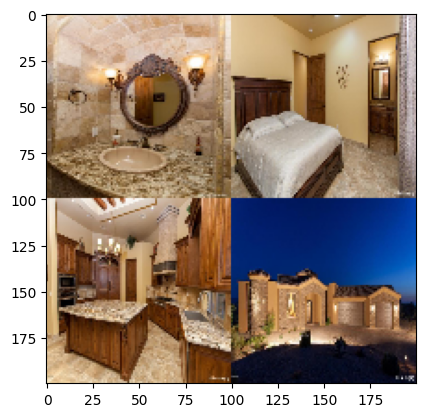

In [23]:
plt.imshow(images[1])

In [24]:
images[1].shape

(200, 200, 3)

In [25]:
images.shape

(535, 200, 200, 3)

In [26]:
images_list = []
for i in range(535):
  images_list.append(images[i])

images = pd.Series(images_list, name="Images")

# now we concat images list to dataframe :

In [27]:
df = pd.concat([images , df_info], axis=1)
df

,Images,Bedrooms,bathrooms,Area,Zipcode,Price
0,"[[[171, 150, 119], [175, 150, 109], [123, 88, ...",4,4.0,4053,85255,869500
1,"[[[229, 205, 178], [227, 205, 182], [227, 209,...",4,3.0,3343,36372,865200
2,"[[[89, 42, 13], [100, 54, 31], [125, 85, 70], ...",3,4.0,3923,85266,889000
3,"[[[247, 204, 162], [251, 206, 165], [255, 212,...",5,5.0,4022,85262,910000
4,"[[[224, 250, 253], [91, 93, 84], [186, 156, 11...",3,4.0,4116,85266,971226
...,...,...,...,...,...,...
530,"[[[231, 231, 230], [242, 242, 242], [246, 246,...",5,2.0,2066,94531,399900
531,"[[[181, 180, 180], [222, 221, 220], [206, 206,...",4,3.5,9536,94531,460000
532,"[[[34, 32, 32], [36, 34, 35], [31, 30, 31], [3...",3,2.0,2014,94531,407000
533,"[[[252, 252, 252], [251, 251, 251], [248, 248,...",4,3.0,2312,94531,419000


In [28]:
df["bathrooms"] = df["bathrooms"].astype(int)
df

,Images,Bedrooms,bathrooms,Area,Zipcode,Price
0,"[[[171, 150, 119], [175, 150, 109], [123, 88, ...",4,4,4053,85255,869500
1,"[[[229, 205, 178], [227, 205, 182], [227, 209,...",4,3,3343,36372,865200
2,"[[[89, 42, 13], [100, 54, 31], [125, 85, 70], ...",3,4,3923,85266,889000
3,"[[[247, 204, 162], [251, 206, 165], [255, 212,...",5,5,4022,85262,910000
4,"[[[224, 250, 253], [91, 93, 84], [186, 156, 11...",3,4,4116,85266,971226
...,...,...,...,...,...,...
530,"[[[231, 231, 230], [242, 242, 242], [246, 246,...",5,2,2066,94531,399900
531,"[[[181, 180, 180], [222, 221, 220], [206, 206,...",4,3,9536,94531,460000
532,"[[[34, 32, 32], [36, 34, 35], [31, 30, 31], [3...",3,2,2014,94531,407000
533,"[[[252, 252, 252], [251, 251, 251], [248, 248,...",4,3,2312,94531,419000


# Create model & train :

In [29]:
X = np.array(df["Images"].values.tolist())
Y = np.array(df["Price"].values.tolist())

print(X.shape)
print(Y.shape)


(535, 200, 200, 3)
(535,)


In [30]:
from sklearn.model_selection import train_test_split

X_train , X_val , Y_train , Y_val = train_test_split(X , Y , test_size=0.1)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(481, 200, 200, 3)
(54, 200, 200, 3)
(481,)
(54,)


In [31]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = image_data_generator.flow(
    X_train,
    Y_train,
    shuffle=True
)

validation_data = image_data_generator.flow(
    X_val,
    Y_val,
    batch_size=16,
    shuffle=False
)

In [32]:
del X
del Y
del df
del images
del image

# wandb

In [33]:
run = wandb.init(project="House_price_prediction")

from wandb.sdk.wandb_run import wandb_metric
config = wandb.config
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models"),
]


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
initial_model = tf.keras.applications.EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=(200,200,3),
    pooling="avg"
)

In [ ]:
for layer in initial_model.layers:
  layer.trainable = False

In [ ]:

model = tf.keras.Sequential([
    initial_model,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="linear")
])


model.compile(loss=tf.keras.losses.mean_absolute_percentage_error , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)) # chon regression hast niyazi be accuracy nadarim


In [39]:
history = model.fit(train_data , validation_data=validation_data , epochs=30 , callbacks=wandb_callbacks)

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 99.9969

wandb: Adding directory to artifact (./models)... Done. 2.1s


16/16 [==============================] - 16s 677ms/step - loss: 99.9969 - val_loss: 99.9908
Epoch 2/15
16/16 [==============================] - ETA: 0s - loss: 99.9730

wandb: Adding directory to artifact (./models)... Done. 1.5s


16/16 [==============================] - 11s 698ms/step - loss: 99.9730 - val_loss: 99.9422
Epoch 3/15
16/16 [==============================] - ETA: 0s - loss: 99.8704

wandb: Adding directory to artifact (./models)... Done. 5.0s


16/16 [==============================] - 12s 755ms/step - loss: 99.8704 - val_loss: 99.7447
Epoch 4/15
16/16 [==============================] - ETA: 0s - loss: 99.4900

wandb: Adding directory to artifact (./models)... Done. 1.0s


16/16 [==============================] - 7s 433ms/step - loss: 99.4900 - val_loss: 99.0540
Epoch 5/15
16/16 [==============================] - ETA: 0s - loss: 98.3039

wandb: Adding directory to artifact (./models)... Done. 0.3s


16/16 [==============================] - 10s 642ms/step - loss: 98.3039 - val_loss: 97.1311
Epoch 6/15
16/16 [==============================] - ETA: 0s - loss: 95.3353

wandb: Adding directory to artifact (./models)... Done. 1.0s


16/16 [==============================] - 8s 515ms/step - loss: 95.3353 - val_loss: 92.4769
Epoch 7/15
16/16 [==============================] - ETA: 0s - loss: 88.5334

wandb: Adding directory to artifact (./models)... Done. 4.9s


16/16 [==============================] - 14s 851ms/step - loss: 88.5334 - val_loss: 82.5945
Epoch 8/15
16/16 [==============================] - ETA: 0s - loss: 77.5547

wandb: Adding directory to artifact (./models)... Done. 1.0s


16/16 [==============================] - 14s 887ms/step - loss: 77.5547 - val_loss: 70.4920
Epoch 9/15
16/16 [==============================] - ETA: 0s - loss: 69.7693

wandb: Adding directory to artifact (./models)... Done. 3.3s


16/16 [==============================] - 13s 855ms/step - loss: 69.7693 - val_loss: 71.0400
Epoch 10/15
16/16 [==============================] - ETA: 0s - loss: 69.8426

wandb: Adding directory to artifact (./models)... Done. 2.7s


16/16 [==============================] - 9s 594ms/step - loss: 69.8426 - val_loss: 71.9398
Epoch 11/15
16/16 [==============================] - ETA: 0s - loss: 69.3985

wandb: Adding directory to artifact (./models)... Done. 3.4s


16/16 [==============================] - 11s 697ms/step - loss: 69.3985 - val_loss: 71.4416
Epoch 12/15
16/16 [==============================] - ETA: 0s - loss: 69.1448

wandb: Adding directory to artifact (./models)... Done. 0.4s


16/16 [==============================] - 10s 647ms/step - loss: 69.1448 - val_loss: 72.5423
Epoch 13/15
16/16 [==============================] - ETA: 0s - loss: 69.7222

wandb: Adding directory to artifact (./models)... Done. 1.6s


16/16 [==============================] - 10s 661ms/step - loss: 69.7222 - val_loss: 72.0330
Epoch 14/15
16/16 [==============================] - ETA: 0s - loss: 69.1361

wandb: Adding directory to artifact (./models)... Done. 5.1s


16/16 [==============================] - 19s 1s/step - loss: 69.1361 - val_loss: 72.0827
Epoch 15/15
16/16 [==============================] - ETA: 0s - loss: 69.8109

wandb: Adding directory to artifact (./models)... Done. 1.0s


16/16 [==============================] - 9s 594ms/step - loss: 69.8109 - val_loss: 71.6671


In [40]:
model.save("/content/drive/MyDrive/House_price.keras")

# Inference

In [7]:
model= tf.keras.models.load_model("/content/drive/MyDrive/House_price.keras")

In [9]:
test_images_list = []
test_images_dir = "/content/test"
for image in os.listdir(test_images_dir):
  img = cv2.imread("/content/test/" + image)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  test_images_list.append(img)


In [10]:
df_images = pd.Series(test_images_list, name="Images")
df_images

0    [[[132, 178, 228], [133, 179, 229], [132, 180,...
1    [[[24, 19, 15], [18, 13, 9], [12, 7, 3], [9, 4...
2    [[[88, 75, 58], [88, 75, 58], [88, 75, 58], [8...
3    [[[133, 132, 130], [133, 132, 130], [133, 132,...
4    [[[240, 242, 241], [240, 242, 241], [240, 242,...
5    [[[196, 226, 255], [193, 223, 255], [190, 219,...
6    [[[124, 152, 130], [88, 116, 93], [80, 106, 81...
7    [[[139, 150, 146], [156, 167, 163], [161, 172,...
Name: Images, dtype: object

In [14]:
images=[]
for i in range(2) :
  basePath = os.path.sep.join([test_images_dir, "{}_*".format(i + 1)])
  print(basePath)
  housePaths = sorted(list(glob.glob(basePath)))
  print(housePaths)
  inputImages = []
  outputImage = np.zeros((200, 200, 3), dtype="uint8")

  for housePath in housePaths:
    image = cv2.imread(housePath)
    image = cv2.resize(image, (100, 100))
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    inputImages.append(image)

  outputImage[0:100, 0:100] = inputImages[0]
  outputImage[0:100, 100:200] = inputImages[1]
  outputImage[100:200, 100:200] = inputImages[2]
  outputImage[100:200, 0:100] = inputImages[3]
  images.append(outputImage)

images = np.array(images)

/content/test/1_*
['/content/test/1_bathroom.jpg', '/content/test/1_bedroom.jpg', '/content/test/1_frontal.jpg', '/content/test/1_kitchen.jpg']
/content/test/2_*
['/content/test/2_bathroom.jpg', '/content/test/2_bedroom.jpg', '/content/test/2_frontal.jpg', '/content/test/2_kitchen.jpg']


In [15]:
print(housePaths[0])
print(housePaths[1])
print(housePaths[2])
print(housePaths[3])


/content/test/2_bathroom.jpg
/content/test/2_bedroom.jpg
/content/test/2_frontal.jpg
/content/test/2_kitchen.jpg


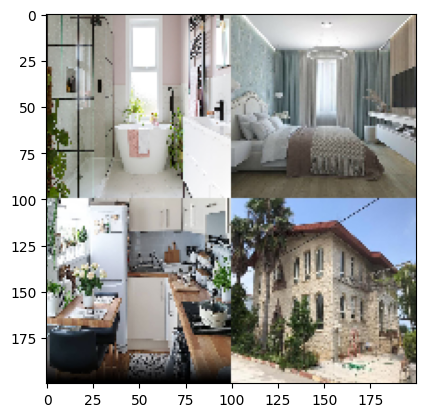

In [16]:
plt.imshow(images[0])

1/1 [==============================] - 9s 9s/step
predicted Price :  183165.69


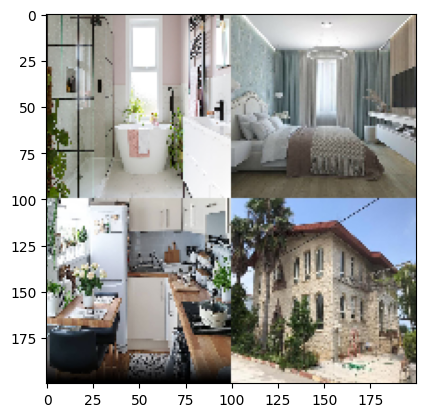

In [17]:
new_image = cv2.resize(images[0] , (200,200))
plt.imshow(new_image)
new_image = new_image / 255.0
new_image = np.reshape(new_image, [1, 200, 200, 3]) # new_iamge.reshape(1,299,299,3)

output = model.predict(new_image)
print('predicted Price : ' , output[0][0])

# My House :

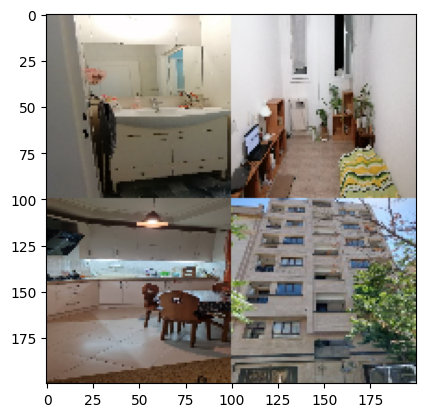

In [18]:
plt.imshow(images[1])

1/1 [==============================] - 0s 19ms/step
predicted House Price :  155775.89


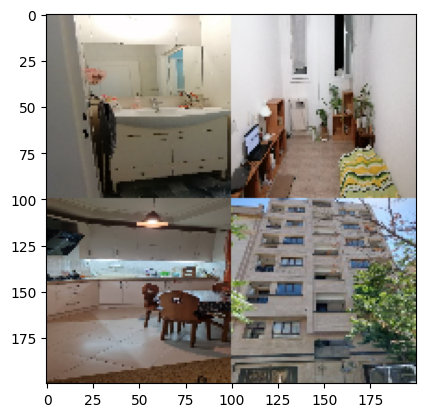

In [20]:
new_image = cv2.resize(images[1] , (200,200))
plt.imshow(new_image)
new_image = new_image / 255.0
new_image = np.reshape(new_image, [1, 200, 200, 3]) # new_iamge.reshape(1,299,299,3)

output = model.predict(new_image)
print('predicted House Price : ' , output[0][0])